In [1]:
import pandas as pd
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns


In [ ]:
#%load_ext rpy2.ipython

#1.1 Data Preprocessing
goal:  explore the dataset and transform categorical features to numerical values

In [ ]:
#load data from google drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
#drive.mount('/content/gdrive')
path = '/gdrive/MyDrive/Colab Notebooks/chip_dataset.csv'
chip_dataset = pd.read_csv(path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read in the dataset locally
chip_dataset = pd.read_csv('./chip_dataset.csv')

# drop the first column which list all the indices
chip_dataset.drop('Unnamed: 0', inplace=True, axis=1)

chip_dataset

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4849,NVIDIA Quadro 3000M,GPU,2011-02-22,40.0,75.0,332.0,1950.0,450.0,TSMC,NVIDIA,NaN,432.0,36.0
4850,Intel GMA 950,GPU,2005-06-01,90.0,7.0,NaN,NaN,250.0,Intel,Intel,NaN,NaN,NaN
4851,NVIDIA GeForce GT 320M,GPU,2010-03-03,40.0,23.0,100.0,486.0,500.0,TSMC,NVIDIA,NaN,52.8,NaN
4852,NVIDIA GeForce FX 5200,GPU,2003-03-06,150.0,NaN,65.0,29.0,250.0,TSMC,NVIDIA,NaN,NaN,NaN


In [4]:
chip_dataset.describe(include='all')

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
count,4854,4854,4854,4845.000000,4228.000000,4139.000000,4143.000000,4854.000000,4854,4854,536.000000,1948.000000,1306.000000
unique,4278,2,1357,NaN,NaN,NaN,NaN,NaN,10,5,NaN,NaN,NaN
top,AMD Athlon 64 3200+,GPU,NaT,NaN,NaN,NaN,NaN,NaN,TSMC,AMD,NaN,NaN,NaN
freq,12,2662,75,NaN,NaN,NaN,NaN,NaN,2178,1662,NaN,NaN,NaN
mean,NaN,NaN,NaN,55.109598,81.359981,188.440445,1929.922279,1484.406057,NaN,NaN,8397.459851,2134.756653,363.670511
std,NaN,NaN,NaN,44.998676,76.807808,126.189383,4044.891098,1066.701523,NaN,NaN,13799.551131,3898.431487,1145.931856
min,NaN,NaN,NaN,0.000000,1.000000,1.000000,8.000000,100.000000,NaN,NaN,10.020000,12.800000,3.600000
25%,NaN,NaN,NaN,22.000000,33.000000,104.000000,154.000000,590.000000,NaN,NaN,768.800000,257.300000,38.295000
50%,NaN,NaN,NaN,40.000000,65.000000,148.000000,624.000000,1073.500000,NaN,NaN,2965.500000,696.000000,89.280000
75%,NaN,NaN,NaN,90.000000,100.000000,239.000000,1550.000000,2400.000000,NaN,NaN,10600.000000,2116.750000,220.000000


To have a brief overview of the dataset, we want to have a look of the head of the data frame and the maxium and minimum.

In [ ]:
print("Look at the head (i.e. first 5 samples/trails) of the dataframe:")
chip_dataset.head()

Look at the head (i.e. first 5 samples/trails) of the dataframe:


,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


In [ ]:
print("Look at minimum values for each attribute/feature:")
chip_dataset.min()

Look at minimum values for each attribute/feature:


Product                  3dfx Spectre 1000
Type                                   CPU
Release Date                    2000-01-01
Process Size (nm)                      0.0
TDP (W)                                1.0
Die Size (mm^2)                        1.0
Transistors (million)                  8.0
Freq (MHz)                           100.0
Foundry                                 GF
Vendor                                 AMD
FP16 GFLOPS                          10.02
FP32 GFLOPS                           12.8
FP64 GFLOPS                            3.6
dtype: object

In [ ]:
print("Look at maximum values for each attribute/feature:")
chip_dataset.max()

Look at maximum values for each attribute/feature:


Product                  XGI Volari V8 Ultra
Type                                     GPU
Release Date                             NaT
Process Size (nm)                      250.0
TDP (W)                                900.0
Die Size (mm^2)                        826.0
Transistors (million)                54200.0
Freq (MHz)                            4700.0
Foundry                              Unknown
Vendor                                 Other
FP16 GFLOPS                         184600.0
FP32 GFLOPS                          40000.0
FP64 GFLOPS                          11540.0
dtype: object

We notic that the release Date is in the form of yyyy-mm-dd form, to make it easier to discuss, we firstly transform it to the years from 2000-1-1 and replace it to the [years from 2000].

In [ ]:
for i in range(len(chip_dataset['Release Date'])):
  if 'Na' in chip_dataset.iat[i, 2] :
    chip_dataset.iat[i, 2] = np.NaN
  else:
    year = int(chip_dataset.iat[i, 2][0:4])-2000
    month = int(chip_dataset.iat[i, 2][5:7])/12
    day = int(chip_dataset.iat[i, 2][8:10])/365
    chip_dataset.iat[i, 2] = year+ month + day

In [ ]:
print("Look at the head (i.e. first 5 samples/trails) of the dataframe:")
chip_dataset.head()

Look at the head (i.e. first 5 samples/trails) of the dataframe:


,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 64 3500+,CPU,7.221461,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,AMD Athlon 200GE,CPU,18.766438,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,Intel Core i5-1145G7,CPU,20.755479,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,Intel Xeon E5-2603 v2,CPU,13.75274,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,AMD Phenom II X4 980 BE,CPU,11.424886,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


In [ ]:
print("Look at the 'Release Date' column:")
chip_dataset['Release Date']

Look at the 'Release Date' column:


0        7.221461
1       18.766438
2       20.755479
3        13.75274
4       11.424886
          ...    
4849    11.226941
4850      5.50274
4851    10.258219
4852     3.266438
4853      8.50274
Name: Release Date, Length: 4854, dtype: object

We notice that the CPU doesn't have GFLOPS values and we decide to split the data into two subset by [Type].

#1.2 Data Spliting
goal:  split data into dataframe subsets

First, the data is consisted with two main category :[CPU] and [GPU], and they are evaluate by different performance. We are trying to split the data into the two subset and discuss which factors are related to the chips performance and we are trying to distinguish the relationship between them.

In [ ]:
grouped = chip_dataset.groupby(chip_dataset['Type'])

# spilt and get the CPU dataset
CPU = grouped.get_group('CPU')
del CPU['FP16 GFLOPS']
del CPU['FP32 GFLOPS']
del CPU['FP64 GFLOPS']

# split and get the GPU dataset
GPU = grouped.get_group('GPU')

In [ ]:
# take a look at the CPU dataset
CPU

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,7.221461,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD
1,AMD Athlon 200GE,CPU,18.766438,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD
2,Intel Core i5-1145G7,CPU,20.755479,10.0,28.0,NaN,NaN,2600.0,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,13.75274,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,11.424886,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD
...,...,...,...,...,...,...,...,...,...,...
2187,Intel Xeon Gold 6312U,CPU,21.349772,10.0,185.0,NaN,NaN,2400.0,Intel,Intel
2188,AMD Ryzen 9 4900H,CPU,20.293836,7.0,54.0,156.0,9800.0,3300.0,TSMC,AMD
2189,Intel Core 2 Duo E6550,CPU,7.586073,65.0,65.0,143.0,291.0,2333.0,Intel,Intel
2190,AMD Opteron 246,CPU,5.00274,90.0,85.0,NaN,106.0,2000.0,Unknown,AMD


In [ ]:
# take a look at the GPU dataset
GPU

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
2192,Intel Xeon E3-1275,GPU,11.341553,32.0,95.0,216.0,1160.0,100.0,Intel,Intel,NaN,NaN,NaN
2193,Matrox Parhelia 128 MB,GPU,2.568493,150.0,NaN,174.0,80.0,200.0,UMC,Other,NaN,NaN,NaN
2194,NVIDIA GeForce MX150 GP107,GPU,19.22968,14.0,25.0,132.0,3300.0,1469.0,Samsung,NVIDIA,18.38,1177.0,36.77
2195,Intel GMA 500,GPU,8.255479,130.0,NaN,NaN,NaN,200.0,Intel,Intel,NaN,12.8,NaN
2196,ATI Radeon HD 4350 AGP,GPU,8.832192,55.0,20.0,73.0,242.0,600.0,TSMC,ATI,NaN,96.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4849,NVIDIA Quadro 3000M,GPU,11.226941,40.0,75.0,332.0,1950.0,450.0,TSMC,NVIDIA,NaN,432.0,36.00
4850,Intel GMA 950,GPU,5.50274,90.0,7.0,NaN,NaN,250.0,Intel,Intel,NaN,NaN,NaN
4851,NVIDIA GeForce GT 320M,GPU,10.258219,40.0,23.0,100.0,486.0,500.0,TSMC,NVIDIA,NaN,52.8,NaN
4852,NVIDIA GeForce FX 5200,GPU,3.266438,150.0,NaN,65.0,29.0,250.0,TSMC,NVIDIA,NaN,NaN,NaN


#2.1 Data Explanation

In [ ]:
#First we want to know the data length of each category:
print("Display number of rows and columns of the CPU dataframe:")
display(CPU.shape)

print("\nDisplay number of rows and columns of the GPU dataframe:")
display(GPU.shape)

print("\nLook at the head (i.e. first 5 samples/trails) of the CPU dataframe:")
CPU.head()

Display number of rows and columns of the CPU dataframe:


(2192, 10)


Display number of rows and columns of the GPU dataframe:


(2662, 13)


Look at the head (i.e. first 5 samples/trails) of the CPU dataframe:


,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,7.221461,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD
1,AMD Athlon 200GE,CPU,18.766438,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD
2,Intel Core i5-1145G7,CPU,20.755479,10.0,28.0,NaN,NaN,2600.0,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,13.75274,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,11.424886,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD


In [ ]:
print("Look at the head (i.e. first 5 samples/trails) of the GPU dataframe:")
GPU.head()

Look at the head (i.e. first 5 samples/trails) of the GPU dataframe:


,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
2192,Intel Xeon E3-1275,GPU,11.341553,32.0,95.0,216.0,1160.0,100.0,Intel,Intel,NaN,NaN,NaN
2193,Matrox Parhelia 128 MB,GPU,2.568493,150.0,NaN,174.0,80.0,200.0,UMC,Other,NaN,NaN,NaN
2194,NVIDIA GeForce MX150 GP107,GPU,19.22968,14.0,25.0,132.0,3300.0,1469.0,Samsung,NVIDIA,18.38,1177.0,36.77
2195,Intel GMA 500,GPU,8.255479,130.0,NaN,NaN,NaN,200.0,Intel,Intel,NaN,12.8,NaN
2196,ATI Radeon HD 4350 AGP,GPU,8.832192,55.0,20.0,73.0,242.0,600.0,TSMC,ATI,NaN,96.0,NaN


Interpretation of the CPU dataset: The data [CPU] contains 2192 observations with 10 variables/features, which are:

1.  Product: the product name of the chip.
2.  Type: whether the given chip is a CPU or GPU.
3.  Release Data: release data of the product. 
4.  Process Size (nm): physical size of the components that makes up a chip/product measured in nm.
5.  TDP (W): thermal design point of the product measured in W.
6.  Die Size (mm^2): physical dimension of bare die measured in mm^2.
7.  Transistors (million): number of transistors represented in unit of million.
8.  Freq (MHz): frequency measured in MHz.
9.  Foundry: company that makes the CPU/GPU.
10. Vendor: seller of the CPU/GPU.

#2.2 Data Visualization

In [ ]:
CPU.columns.values

array(['Product', 'Type', 'Release Date', 'Process Size (nm)', 'TDP (W)',
       'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)',
       'Foundry', 'Vendor'], dtype=object)

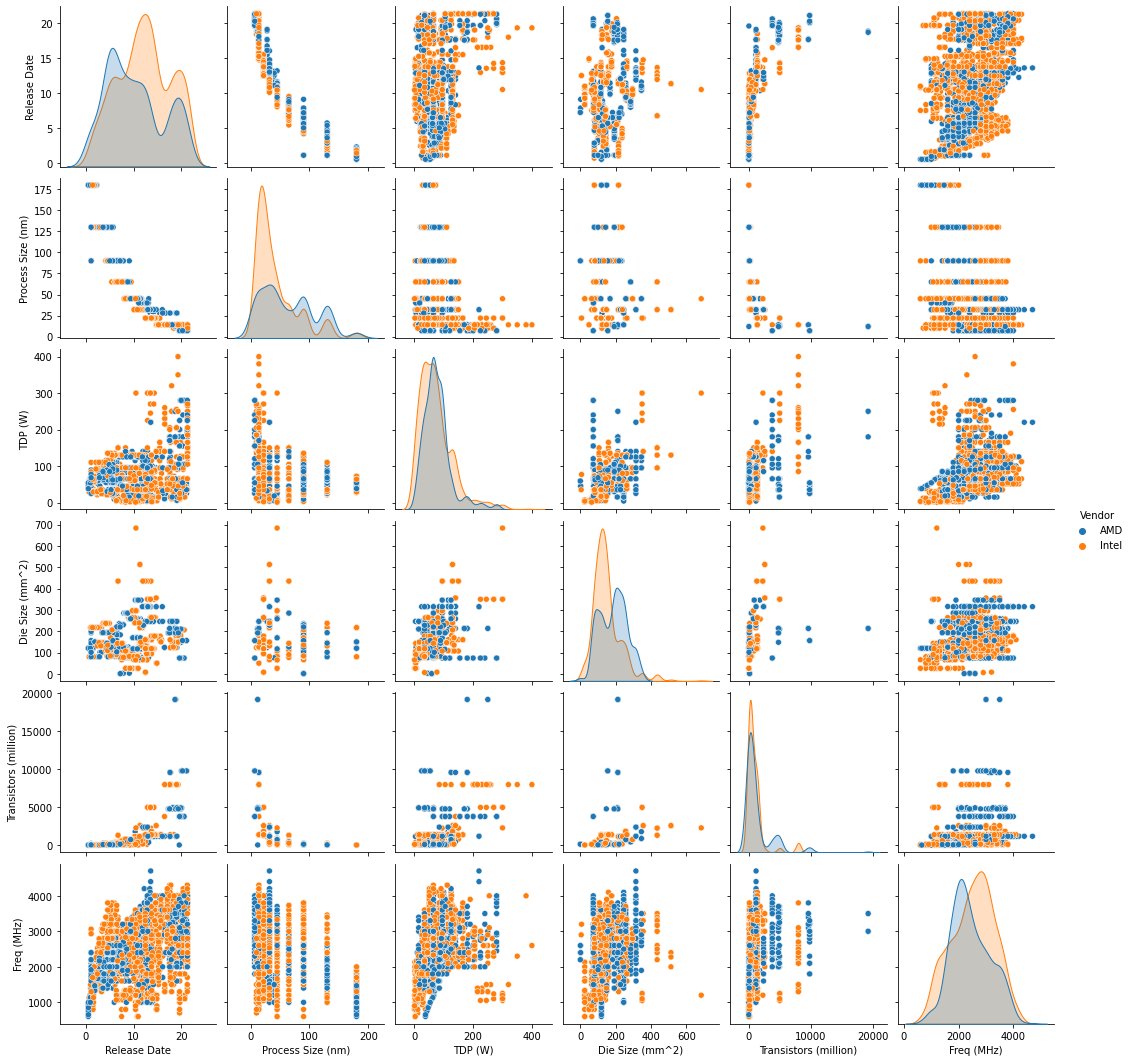

In [ ]:
_ = sns.pairplot(CPU, hue='Vendor')

Interpretation of the GPU dataset: The data [GPU] contains 2662 ovservations with 13 variables, which are:

1.   Product: the product name of the chip.
2.  Type: whether the given chip is a CPU or GPU.
3.  Release Data: release data of the product. 
4.  Process Size (nm): physical size of the components that makes up a chip/product measured in nm.
5.  TDP (W): thermal design point of the product measured in W.
6.  Die Size (mm^2): physical dimension of bare die measured in mm^2.
7.  Transistors (million): number of transistors represented in unit of million.
8.  Freq (MHz): frequency measured in MHz.
9.  Foundry: company that makes the CPU/GPU.
10. Vendor: seller of the CPU/GPU.
11. FP16 GFLOPS: represent storage of weights, activations, and gradients during training iterations
12. FP32 GFLOPS: store values with larger range and higher precision than FP16 GFLOPS.
13. FP64 GFLOPS: store values with larger range and higher precision than FP32 GFLOPS.

In [ ]:
GPU.columns.values

array(['Product', 'Type', 'Release Date', 'Process Size (nm)', 'TDP (W)',
       'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)',
       'Foundry', 'Vendor', 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'],
      dtype=object)

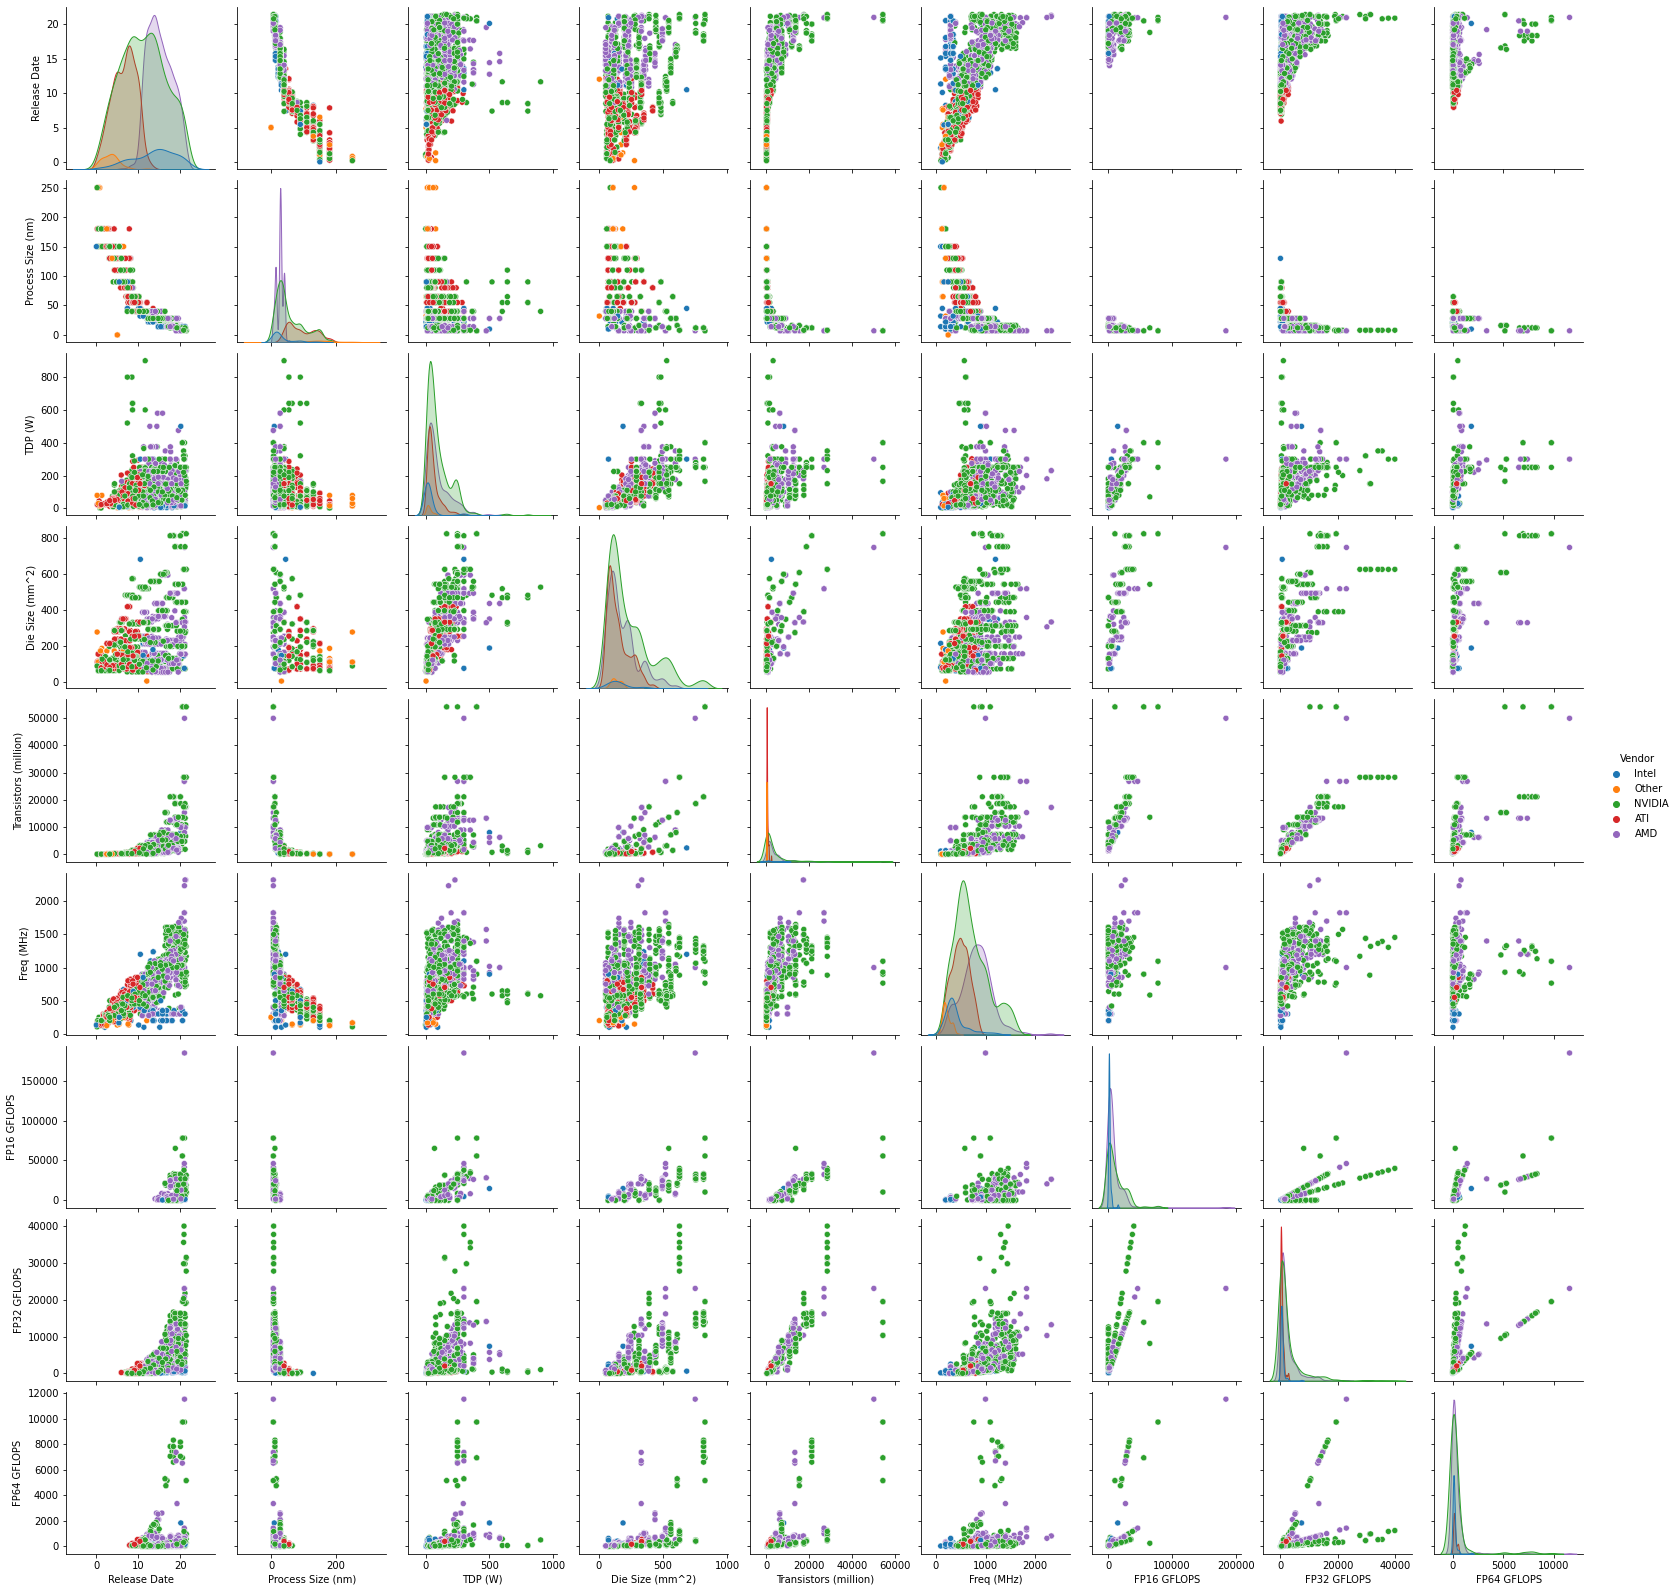

In [ ]:
_ = sns.pairplot(GPU, hue='Vendor')

In [ ]:
# visualize the correlation graph for the CPU dataset
CPU_cor = CPU.copy().corr()
CPU_cor.style.format(precision = 3).background_gradient(cmap='RdBu', vmin=-1, vmax=1)

,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz)
Process Size (nm),1.000,-0.119,-0.151,-0.513,-0.361
TDP (W),-0.119,1.000,0.411,0.432,0.333
Die Size (mm^2),-0.151,0.411,1.000,0.209,0.262
Transistors (million),-0.513,0.432,0.209,1.000,0.197
Freq (MHz),-0.361,0.333,0.262,0.197,1.000


In [ ]:
# visualize the correlation graph for the GPU dataset
GPU_cor = GPU.copy().corr()
GPU_cor.style.format(precision = 3).background_gradient(cmap='RdBu', vmin=-1, vmax=1)

,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
Process Size (nm),1.000,-0.199,-0.270,-0.412,-0.667,-0.369,-0.466,-0.216
TDP (W),-0.199,1.000,0.731,0.478,0.420,0.649,0.517,0.392
Die Size (mm^2),-0.270,0.731,1.000,0.694,0.378,0.692,0.653,0.558
Transistors (million),-0.412,0.478,0.694,1.000,0.527,0.810,0.862,0.685
Freq (MHz),-0.667,0.420,0.378,0.527,1.000,0.276,0.582,0.190
FP16 GFLOPS,-0.369,0.649,0.692,0.810,0.276,1.000,0.728,0.683
FP32 GFLOPS,-0.466,0.517,0.653,0.862,0.582,0.728,1.000,0.520
FP64 GFLOPS,-0.216,0.392,0.558,0.685,0.190,0.683,0.520,1.000


In [ ]:
# data normalization for CPU dataset
from sklearn.preprocessing import MinMaxScaler
CPU_normal = CPU.copy().drop(columns=['Product','Type','Foundry','Vendor'])
scaler = MinMaxScaler()
scaler.fit(CPU_normal)
fit = scaler.fit_transform(CPU_normal)
# fit = pd.DataFrame(fit, columns = CPU_normal.columns)
final = pd.DataFrame(data = fit, columns = CPU_normal.columns, index = CPU_normal.index)
CPU_normal = CPU.copy().drop(columns=CPU_normal.columns).join(final)
CPU_normal

,Product,Type,Foundry,Vendor,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz)
0,AMD Athlon 64 3500+,CPU,Unknown,AMD,0.321634,0.335260,0.110276,0.111274,0.004436,0.390244
1,AMD Athlon 200GE,CPU,Unknown,AMD,0.875211,0.040462,0.085213,0.279649,0.248552,0.634146
2,Intel Core i5-1145G7,CPU,Intel,Intel,0.970584,0.017341,0.067669,NaN,NaN,0.487805
3,Intel Xeon E5-2603 v2,CPU,Intel,Intel,0.634806,0.086705,0.197995,0.232796,0.071127,0.292683
4,AMD Phenom II X4 980 BE,CPU,Unknown,AMD,0.523187,0.219653,0.310777,0.376281,0.037625,0.756098
...,...,...,...,...,...,...,...,...,...,...
2187,Intel Xeon Gold 6312U,CPU,Intel,Intel,0.999080,0.017341,0.461153,NaN,NaN,0.439024
2188,AMD Ryzen 9 4900H,CPU,TSMC,AMD,0.948449,0.000000,0.132832,0.226940,0.509471,0.658537
2189,Intel Core 2 Duo E6550,CPU,Intel,Intel,0.339117,0.335260,0.160401,0.207906,0.013255,0.422683
2190,AMD Opteron 246,CPU,Unknown,AMD,0.215248,0.479769,0.210526,NaN,0.003601,0.341463


In [ ]:
#data normalization for GPU dataset
from sklearn.preprocessing import MinMaxScaler
GPU_normal = GPU.copy().drop(columns=['Product','Type','Foundry','Vendor'])
scaler = MinMaxScaler()
scaler.fit(GPU_normal)
fit = scaler.fit_transform(GPU_normal)

#add back to the dataframe
final = pd.DataFrame(data = fit, columns = GPU_normal.columns, index = GPU_normal.index)
#GPU_normal = GPU.copy().drop(columns=GPU_normal.columns).join(final)
GPU_normal

,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
2192,11.341553,32.0,95.0,216.0,1160.0,100.0,NaN,NaN,NaN
2193,2.568493,150.0,NaN,174.0,80.0,200.0,NaN,NaN,NaN
2194,19.22968,14.0,25.0,132.0,3300.0,1469.0,18.38,1177.0,36.77
2195,8.255479,130.0,NaN,NaN,NaN,200.0,NaN,12.8,NaN
2196,8.832192,55.0,20.0,73.0,242.0,600.0,NaN,96.0,NaN
...,...,...,...,...,...,...,...,...,...
4849,11.226941,40.0,75.0,332.0,1950.0,450.0,NaN,432.0,36.00
4850,5.50274,90.0,7.0,NaN,NaN,250.0,NaN,NaN,NaN
4851,10.258219,40.0,23.0,100.0,486.0,500.0,NaN,52.8,NaN
4852,3.266438,150.0,NaN,65.0,29.0,250.0,NaN,NaN,NaN


In [ ]:
display(CPU.Foundry.unique())
display(CPU.Vendor.unique())
display(GPU.Foundry.unique())
display(GPU.Vendor.unique())

array(['Unknown', 'Intel', 'GF', 'TSMC'], dtype=object)

array(['AMD', 'Intel'], dtype=object)

array(['Intel', 'UMC', 'Samsung', 'TSMC', 'Unknown', 'Renesas', 'GF',
       'Sony', 'NEC', 'IBM'], dtype=object)

array(['Intel', 'Other', 'NVIDIA', 'ATI', 'AMD'], dtype=object)

We found there are mainly four different Foundry of the CPU and with the Vendors are AMD and Intel. The Foundry of GPU are Intel UMC Samsung TSMC Renesas GF Sony NEC and IBM, the Vendor are mainly in Intel NVIDIA ATI and AMD.

We found there are high correlation between this two variable,(A single Foundry usually only hs one corresponding Vendor.So next we will be focus more on Vendor and we will replace the name of it to the number for ml.

In [ ]:
CPU['Vendor'] = CPU['Vendor'].replace(['AMD', 'Intel'], ['0', '1'])
GPU['Vendor'] = GPU['Vendor'].replace(['AMD', 'Intel', 'Other', 'NVIDIA', 'ATI'], ['0', '1','2','3','4'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
